In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df=pd.read_csv('NIFTY 100_minute.csv')

In [5]:
df.head()


,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8300.60,8309.75,8300.60,8308.35,0
1,2015-01-09 09:16:00,8308.35,8308.65,8304.05,8304.20,0
2,2015-01-09 09:17:00,8304.20,8308.20,8304.00,8308.20,0
3,2015-01-09 09:18:00,8308.20,8315.30,8308.20,8315.30,0
4,2015-01-09 09:19:00,8315.30,8316.10,8314.85,8316.10,0


In [6]:
df.tail()


,date,open,high,low,close,volume
974892,2025-07-25 15:25:00,25443.5,25444.65,25440.95,25443.0,0
974893,2025-07-25 15:26:00,25443.0,25445.35,25437.25,25439.0,0
974894,2025-07-25 15:27:00,25439.0,25439.00,25431.25,25434.0,0
974895,2025-07-25 15:28:00,25434.0,25436.65,25427.90,25428.8,0
974896,2025-07-25 15:29:00,25428.8,25439.00,25427.25,25431.7,0


In [40]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8300.60,8309.75,8300.60,8308.35,0
1,2015-01-09 09:16:00,8308.35,8308.65,8304.05,8304.20,0
2,2015-01-09 09:17:00,8304.20,8308.20,8304.00,8308.20,0
3,2015-01-09 09:18:00,8308.20,8315.30,8308.20,8315.30,0
4,2015-01-09 09:19:00,8315.30,8316.10,8314.85,8316.10,0


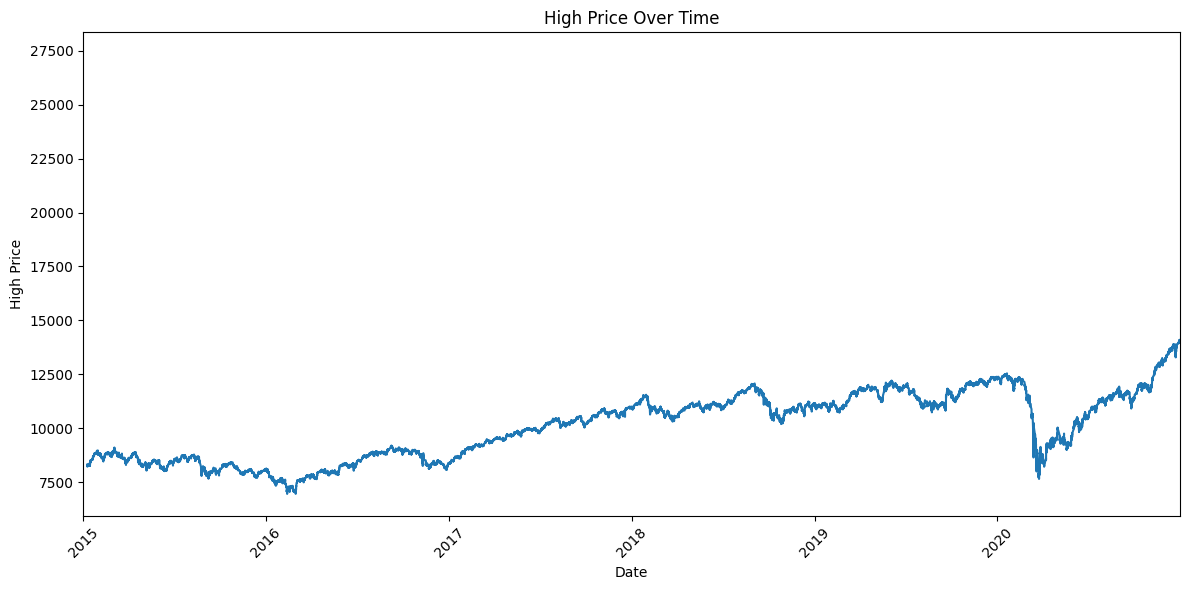

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['high'])
plt.xlim(pd.to_datetime('2015-01-01'), pd.to_datetime('2020-12-31'))
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Over Time')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

In [42]:
# Check for missing values
df.isnull().sum()


date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [7]:
df.columns


Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [44]:
def calculate_rsi(df, period=14):
    """
    Calculates the RSI for a given DataFrame.

    Args:
        df (pd.DataFrame): Pandas DataFrame with data (Open, High, Low, Close).
        period (int): RSI calculation period (default: 14).

    Returns:
        pd.DataFrame: DataFrame with RSI calculated.
    """
    # Calculate price changes
    price_change = df['close'].diff()

    # Calculate gains and losses
    gains = price_change.clip(lower=0)
    losses = -price_change.clip(upper=0)

    # Calculate average gain and loss
    avg_gain = gains.rolling(window=period).mean()
    avg_loss = losses.rolling(window=period).mean()

    # Calculate Relative Strength
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    # Add RSI to the DataFrame
    df['RSI'] = rsi

    return df

In [45]:
calculate_rsi(df,14)

,date,open,high,low,close,volume,RSI
0,2015-01-09 09:15:00,8300.60,8309.75,8300.60,8308.35,0,NaN
1,2015-01-09 09:16:00,8308.35,8308.65,8304.05,8304.20,0,NaN
2,2015-01-09 09:17:00,8304.20,8308.20,8304.00,8308.20,0,NaN
3,2015-01-09 09:18:00,8308.20,8315.30,8308.20,8315.30,0,NaN
4,2015-01-09 09:19:00,8315.30,8316.10,8314.85,8316.10,0,NaN
...,...,...,...,...,...,...,...
974892,2025-07-25 15:25:00,25443.50,25444.65,25440.95,25443.00,0,40.608466
974893,2025-07-25 15:26:00,25443.00,25445.35,25437.25,25439.00,0,37.807882
974894,2025-07-25 15:27:00,25439.00,25439.00,25431.25,25434.00,0,28.655660
974895,2025-07-25 15:28:00,25434.00,25436.65,25427.90,25428.80,0,24.654623


In [46]:
df_nifty50=df.copy()

In [47]:
df_nifty50.dropna(inplace= True)

In [48]:
df_nifty50.reset_index(drop=True)

,date,open,high,low,close,volume,RSI
0,2015-01-09 09:29:00,8304.6,8307.50,8304.00,8307.50,0,49.239033
1,2015-01-09 09:30:00,8307.5,8308.55,8302.50,8302.50,0,48.500882
2,2015-01-09 09:31:00,8303.1,8303.55,8302.20,8302.20,0,44.339623
3,2015-01-09 09:32:00,8302.2,8302.95,8295.65,8296.30,0,31.660232
4,2015-01-09 09:33:00,8296.3,8298.45,8294.50,8297.75,0,32.507150
...,...,...,...,...,...,...,...
974658,2025-07-25 15:25:00,25443.5,25444.65,25440.95,25443.00,0,40.608466
974659,2025-07-25 15:26:00,25443.0,25445.35,25437.25,25439.00,0,37.807882
974660,2025-07-25 15:27:00,25439.0,25439.00,25431.25,25434.00,0,28.655660
974661,2025-07-25 15:28:00,25434.0,25436.65,25427.90,25428.80,0,24.654623


In [49]:
df_nifty50['EMA21'] = df_nifty50['close'].ewm(span=21, adjust=False).mean()
df_nifty50['Direction']=df_nifty50['close']-df_nifty50['open']
df_nifty50['Up/Down'] = np.select([df_nifty50['Direction']<0,df_nifty50['Direction']>=0], [0,1])

In [50]:
del df_nifty50['date']
del df_nifty50['volume']
del df_nifty50['Direction']

<Axes: >

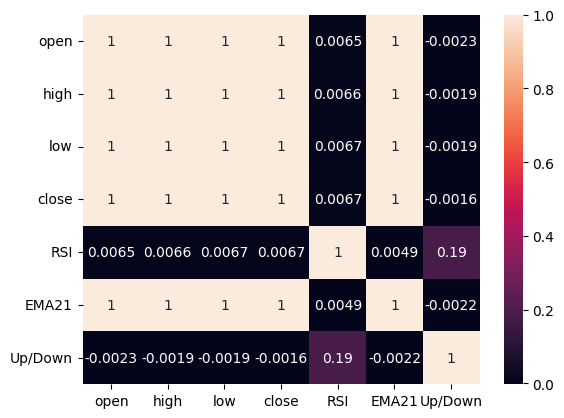

In [51]:
sns.heatmap(data=df_nifty50.corr(), annot=True)

In [52]:
df_ret=df_nifty50['close']
del df_nifty50['open']
del df_nifty50['close']
del df_nifty50['low']
del df_nifty50['high']

<Axes: >

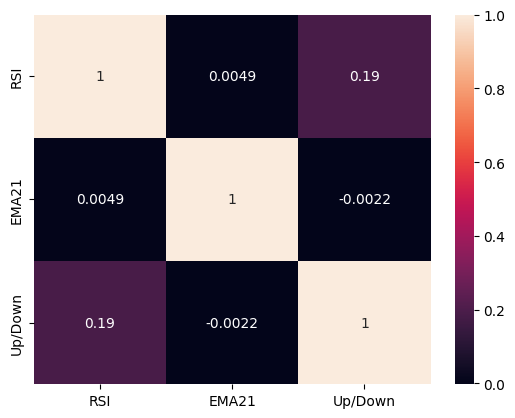

In [53]:
sns.heatmap(data=df_nifty50.corr(), annot=True)

In [54]:
X=df_nifty50.iloc[:,0:-1]
y=df_nifty50.iloc[:,-1]
X

,RSI,EMA21
14,49.239033,8307.500000
15,48.500882,8307.045455
16,44.339623,8306.604959
17,31.660232,8305.668144
18,32.507150,8304.948313
...,...,...
974892,40.608466,25444.057347
974893,37.807882,25443.597588
974894,28.655660,25442.725080
974895,24.654623,25441.459164


In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5708466855221803

In [57]:
df_nifty50['Predicted_Signal'] = model.predict(X)

In [58]:
df_nifty50['Return'] = df_ret.pct_change()

In [59]:
df_nifty50['Strategy_Return'] = df_nifty50['Return'] *df_nifty50.Predicted_Signal

In [60]:
df_nifty50['Cum_Ret'] = df_nifty50['Return'].cumsum()
df_nifty50

,RSI,EMA21,Up/Down,Predicted_Signal,Return,Strategy_Return,Cum_Ret
14,49.239033,8307.500000,1,1,NaN,NaN,NaN
15,48.500882,8307.045455,0,0,-0.000602,-0.0,-0.000602
16,44.339623,8306.604959,0,0,-0.000036,-0.0,-0.000638
17,31.660232,8305.668144,0,0,-0.000711,-0.0,-0.001349
18,32.507150,8304.948313,1,0,0.000175,0.0,-0.001174
...,...,...,...,...,...,...,...
974892,40.608466,25444.057347,0,0,-0.000020,-0.0,1.247495
974893,37.807882,25443.597588,0,0,-0.000157,-0.0,1.247337
974894,28.655660,25442.725080,0,0,-0.000197,-0.0,1.247141
974895,24.654623,25441.459164,0,0,-0.000204,-0.0,1.246936


In [63]:
df_nifty50['Cum_Strategy'] = df_nifty50['Strategy_Return'].cumsum()
df_nifty50.head()

,RSI,EMA21,Up/Down,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
14,49.239033,8307.500000,1,1,NaN,NaN,NaN,NaN
15,48.500882,8307.045455,0,0,-0.000602,-0.0,-0.000602,0.0
16,44.339623,8306.604959,0,0,-0.000036,-0.0,-0.000638,0.0
17,31.660232,8305.668144,0,0,-0.000711,-0.0,-0.001349,0.0
18,32.507150,8304.948313,1,0,0.000175,0.0,-0.001174,0.0
